<center><img src="https://i.gifer.com/3dof.gif"></center>

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder

In [3]:
df = pd.read_csv('/kaggle/input/car-price-predictionused-cars/car data.csv')
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


# EDA

In [4]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [66]:
df.duplicated().sum()

1

In [70]:
df.drop_duplicates(inplace = True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [7]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

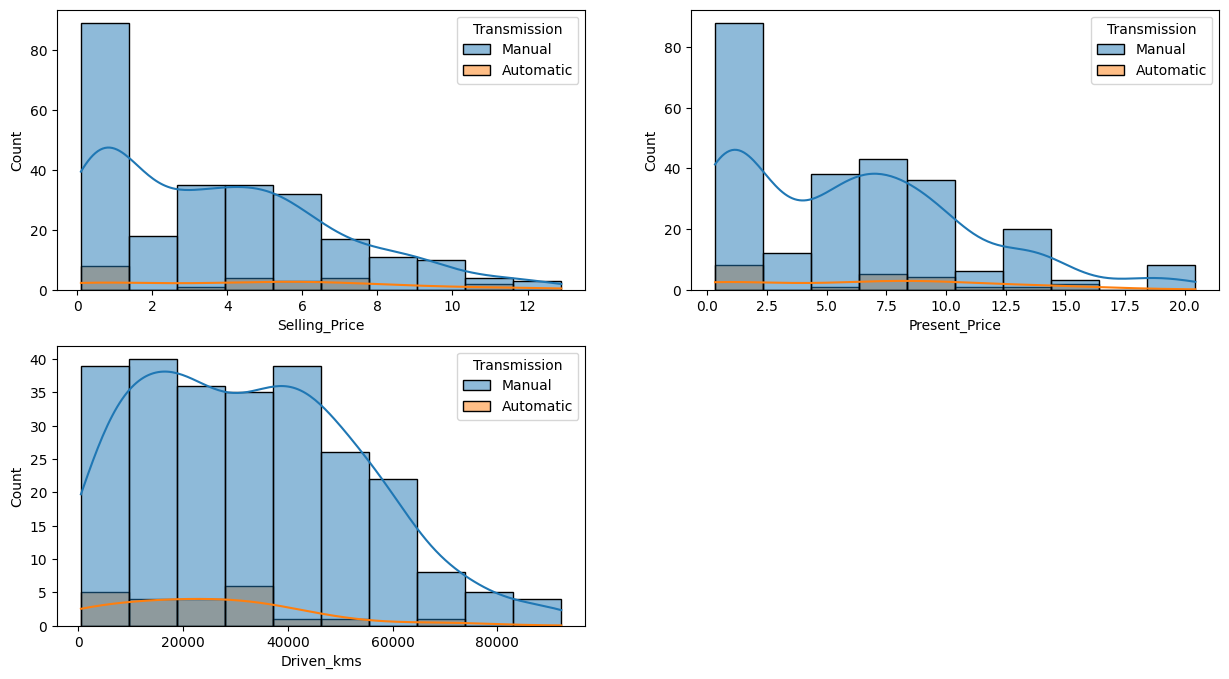

In [49]:
plt.figure(figsize = (15,8))

for i,z in enumerate(['Selling_Price', 'Present_Price','Driven_kms']):
    plt.subplot(2,2,i+1)
    sns.histplot(data = df, x = z,kde = True,hue = 'Transmission')
plt.show()

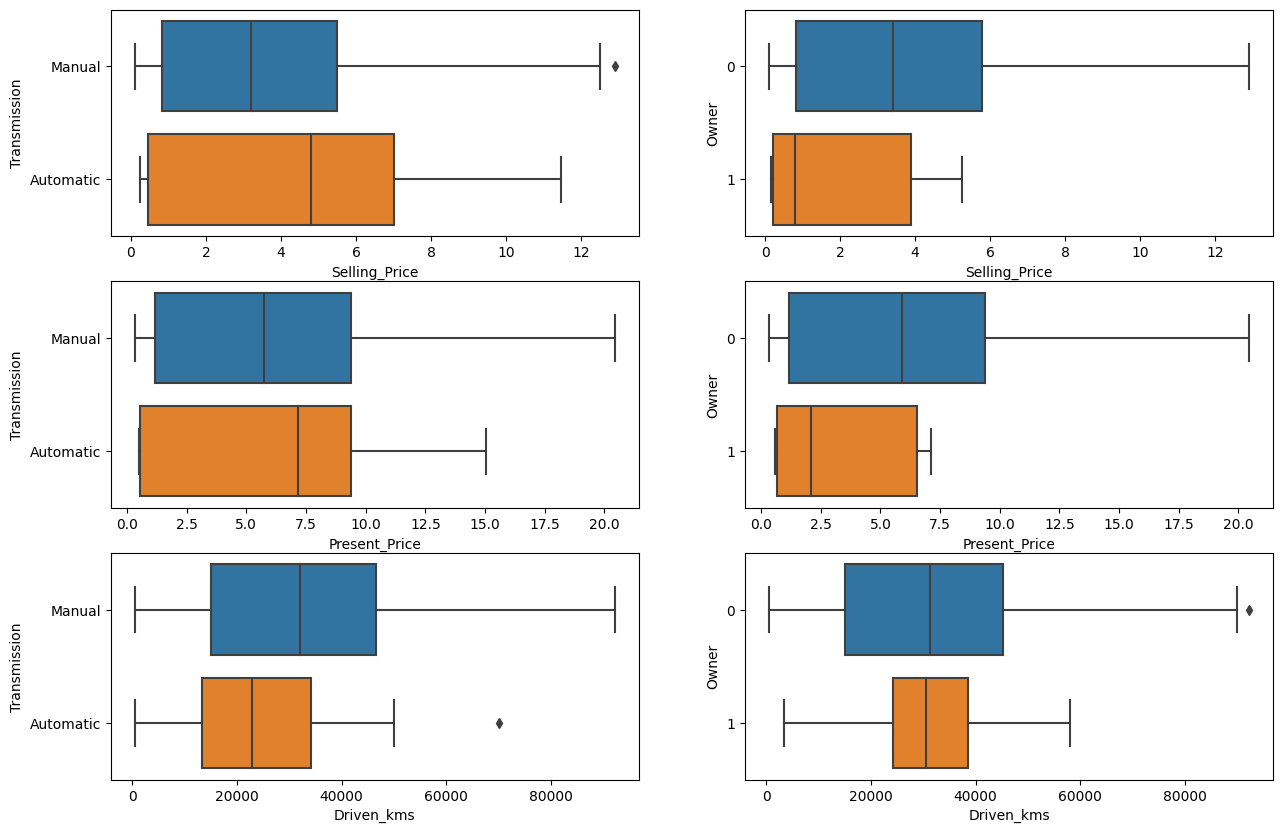

In [48]:
plt.figure(figsize = (15,10))
for i,col in enumerate(['Selling_Price','Present_Price', 'Driven_kms']):
    for j,col2 in enumerate(['Transmission', 'Owner']):
        plt.subplot(3,2,i * 2 + j + 1)
        sns.boxplot(data = df, y = col2,x = col,orient = 'h')

In [26]:
def outliers(col):
    per25 = df[col].quantile(0.25)
    per75 = df[col].quantile(0.75)
    IQR = per75 - per25               #Inter Quartile Range 
    UL = per75 + 1.5 * IQR            #Upper Limit
    LL = per25 - 1.5 * IQR            #Lower Limit
#     print("IQR - ",IQR)
#     print("Upper Limit & Lower Limit - ",UL,LL)
#     print(df[df[col]>UL],'\n',df[df[col]<LL])
    return df[col]>UL

In [42]:
df = df.drop(df[outliers('Selling_Price')].index)

In [47]:
df = df.drop(df[outliers('Present_Price')].index)
df = df.drop(df[outliers('Driven_kms')].index)

In [50]:
df['Transmission'].value_counts()

Transmission
Manual       254
Automatic     22
Name: count, dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


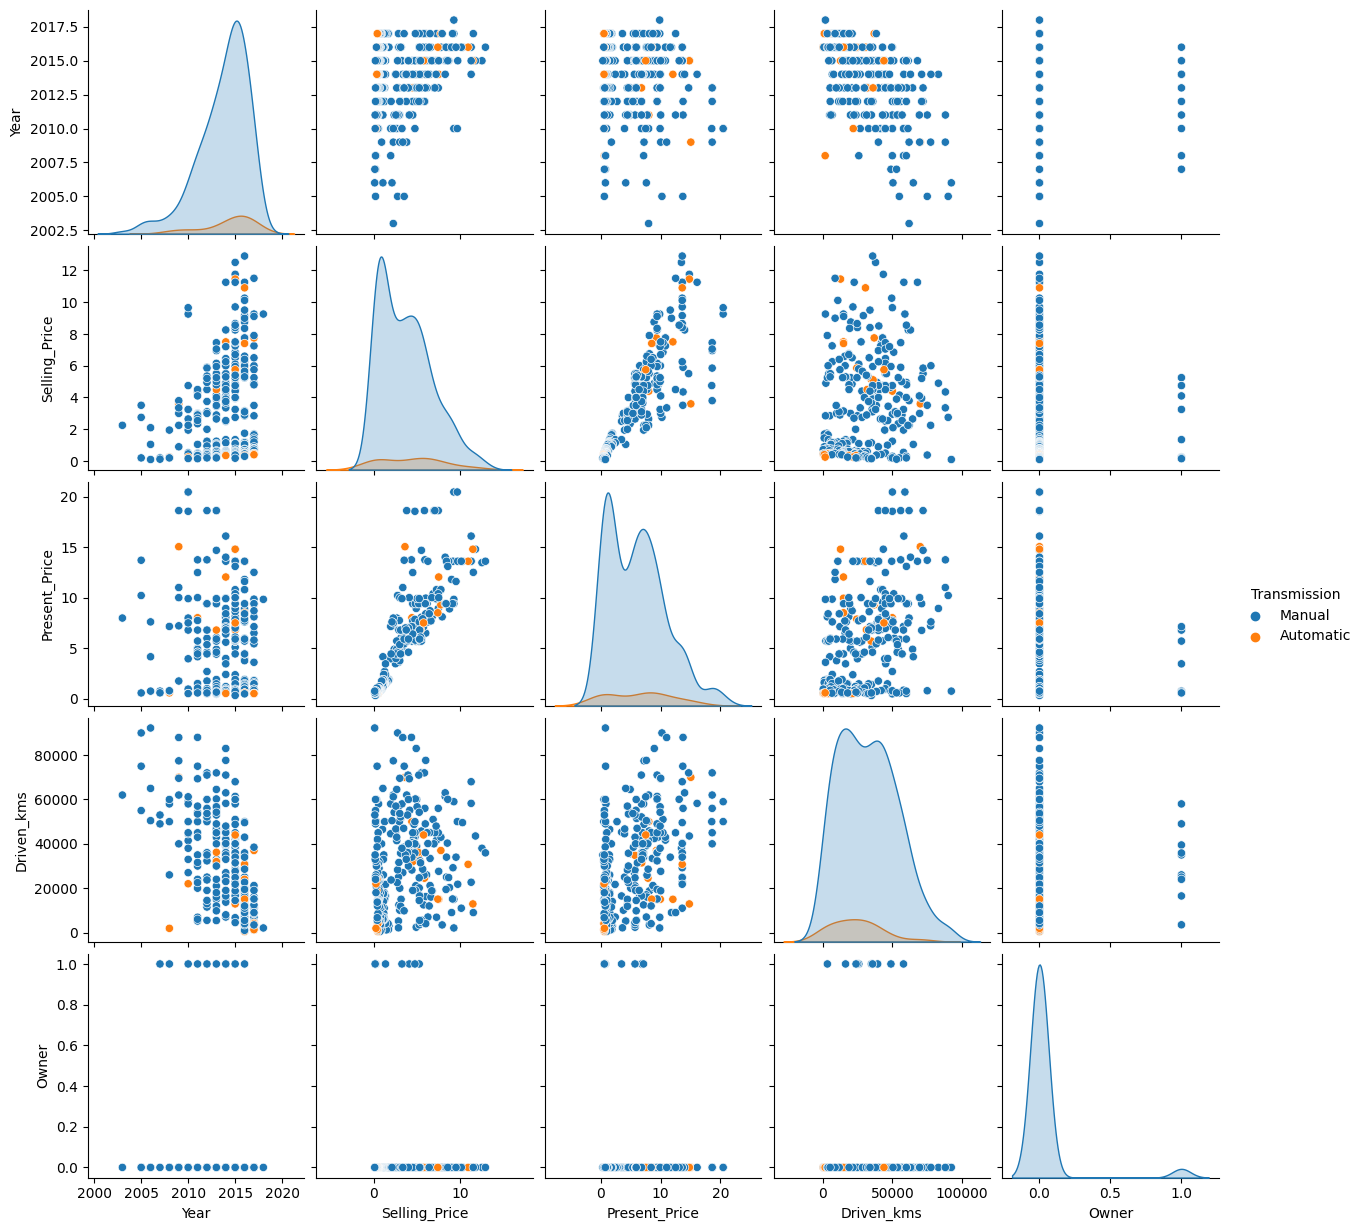

In [51]:
sns.pairplot(data = df , hue = 'Transmission')

In [59]:
Labelencode = LabelEncoder()

In [61]:
cat_vars = df.select_dtypes('O').columns
for i in cat_vars:
    
    df[i] = Labelencode.fit_transform(df[i])
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,86,2014,3.35,5.59,27000,2,0,1,0
1,89,2013,4.75,9.54,43000,1,0,1,0
2,66,2017,7.25,9.85,6900,2,0,1,0
3,92,2011,2.85,4.15,5200,2,0,1,0
4,88,2014,4.60,6.87,42450,1,0,1,0


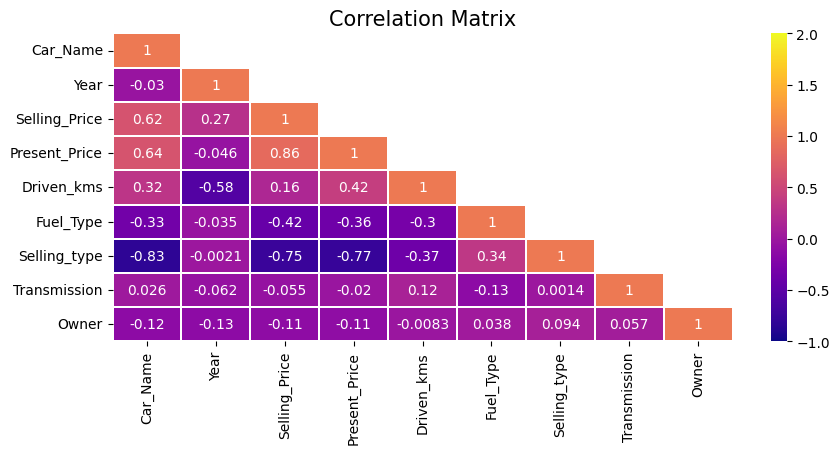

In [62]:
cor =df.corr()
plt.figure(figsize=(10,4))
mask = np.triu(np.ones_like(cor, dtype=bool))
np.fill_diagonal(mask, False)
sns.heatmap(cor, annot=True, mask=mask, vmin=-1, vmax=2,linewidths=0.2, cmap='plasma')
plt.title("Correlation Matrix", fontsize=15)
plt.show()

In [63]:
df.drop(columns = 'Selling_type',axis = 1,inplace=True)

In [64]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Transmission,Owner
0,86,2014,3.35,5.59,27000,2,1,0
1,89,2013,4.75,9.54,43000,1,1,0
2,66,2017,7.25,9.85,6900,2,1,0
3,92,2011,2.85,4.15,5200,2,1,0
4,88,2014,4.60,6.87,42450,1,1,0


# Model Building

In [75]:
Y = df['Selling_Price']
X = df.drop(columns = 'Selling_Price')

In [102]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [78]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X,Y,test_size = 0.2, random_state = 23)

In [79]:
scale = MinMaxScaler()
Xtrain = scale.fit_transform(Xtrain)

In [80]:
Xtest = scale.transform(Xtest)

In [ ]:
# import sklearn.metrics
# sklearn.metrics.get_scorer_names()

In [96]:
kf = KFold(n_splits=15, shuffle=True, random_state=42)
param_grid = {
    'n_estimators': [50,100, 200, 300],
    'max_depth': [None,5, 10, 20],
    'min_samples_split': [2,3, 6, 10]
}

grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           scoring='neg_root_mean_squared_error',  
                           cv=kf,  
                           n_jobs=-1)  # Use -1 to use all available CPU cores


In [97]:
grid_search.fit(Xtrain,ytrain)

GridSearchCV(cv=KFold(n_splits=15, random_state=42, shuffle=True),
             estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 20],
                         'min_samples_split': [2, 3, 6, 10],
                         'n_estimators': [50, 100, 200, 300]},
             scoring='neg_root_mean_squared_error')

In [98]:
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of -0.6829635110545148 using {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 300}


In [103]:
model = LinearRegression()
model.fit(Xtrain, ytrain)


ypred = model.predict(Xtest)


mse = mean_squared_error(ytest, ypred)
r2 = r2_score(ytest, ypred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Squared Error (MSE): 1.26
R-squared (R2): 0.87


In [107]:

rf_model = RandomForestRegressor(random_state=17)


rf_model.fit(Xtrain, ytrain)


rf_Y_pred = rf_model.predict(Xtest)


rf_mse = mean_squared_error(ytest, rf_Y_pred)
rf_r2 = r2_score(ytest, rf_Y_pred)
print(f"Random Forest Mean Squared Error (MSE): {rf_mse:.2f}")
print(f"Random Forest R-squared (R2): {rf_r2:.2f}")

Random Forest Mean Squared Error (MSE): 0.36
Random Forest R-squared (R2): 0.96


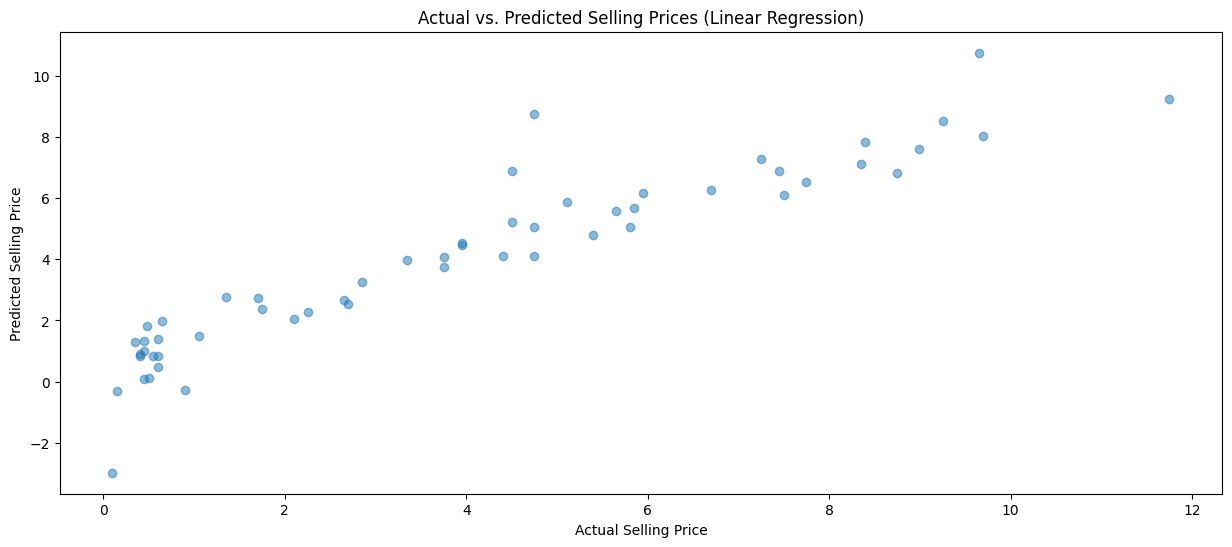

In [106]:
plt.figure(figsize=(15, 6))
plt.scatter(ytest, ypred, alpha=0.5)
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.title('Actual vs. Predicted Selling Prices (Linear Regression)')
plt.show()